**PCA analysis using Eigen values and Eigen vectors**

In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('Iris_data.csv')  # read iris data files
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [34]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
df = df.drop(['Id'],axis = 1)
df = df.reset_index(drop=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


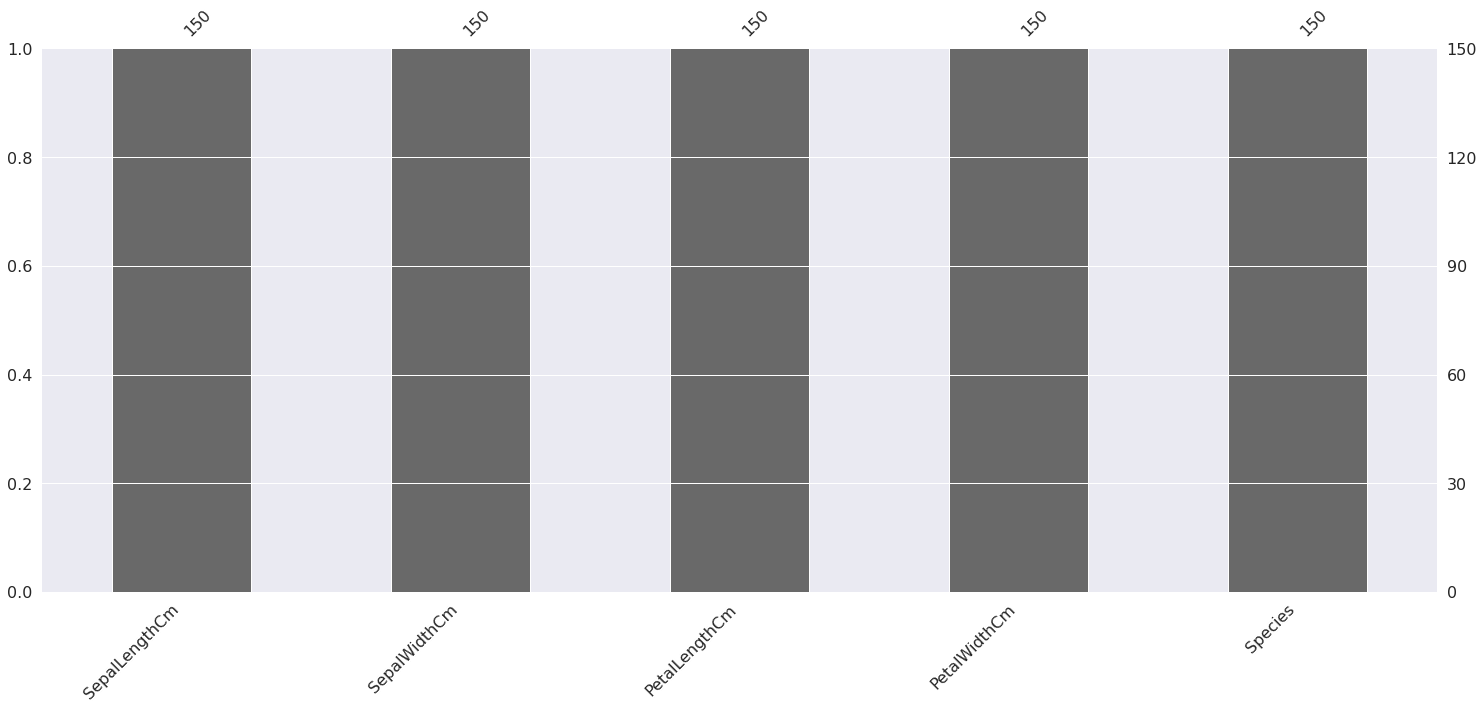

In [36]:
# check null count analysis before modelling to keep check
import missingno as msno 
p = msno.bar(df)

In [37]:
print(df.isnull().values.any())  # check null value present in iris data

False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aceaf0bd0>,
      dtype=object)

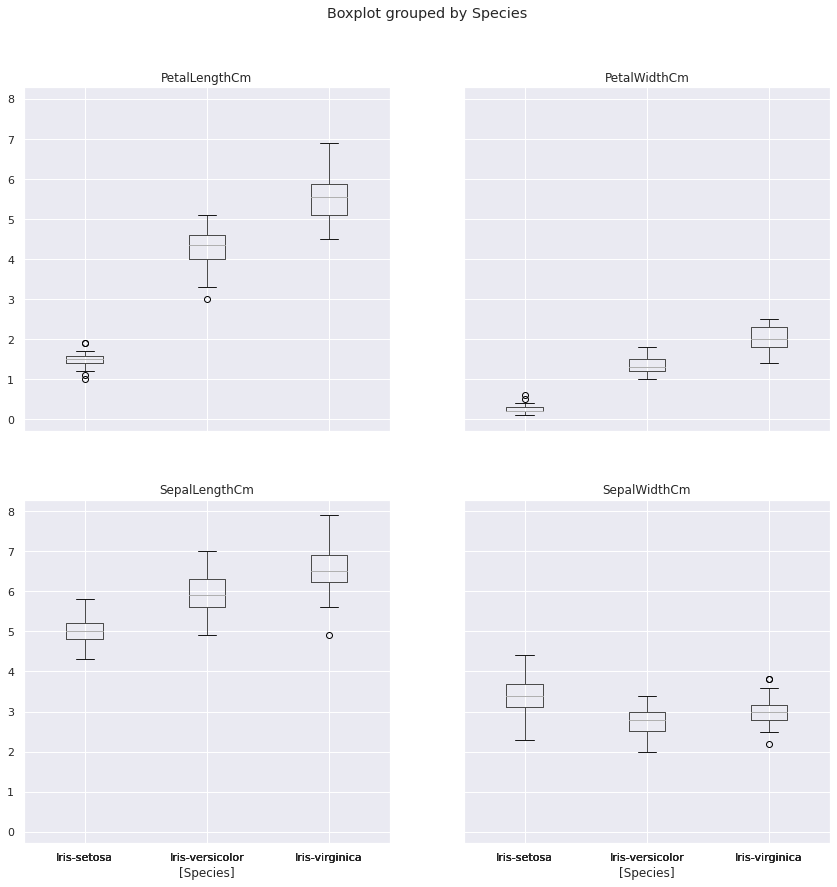

In [38]:
df.boxplot(by="Species", layout=(2, 2), figsize=(14, 14))

*The boxplots show us a number of details such as virginica having the largest median petal, length, width. There are no more than a few outliers in the data*

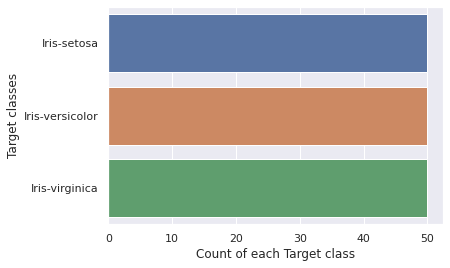

In [39]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

sns.countplot(y=df.Species ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

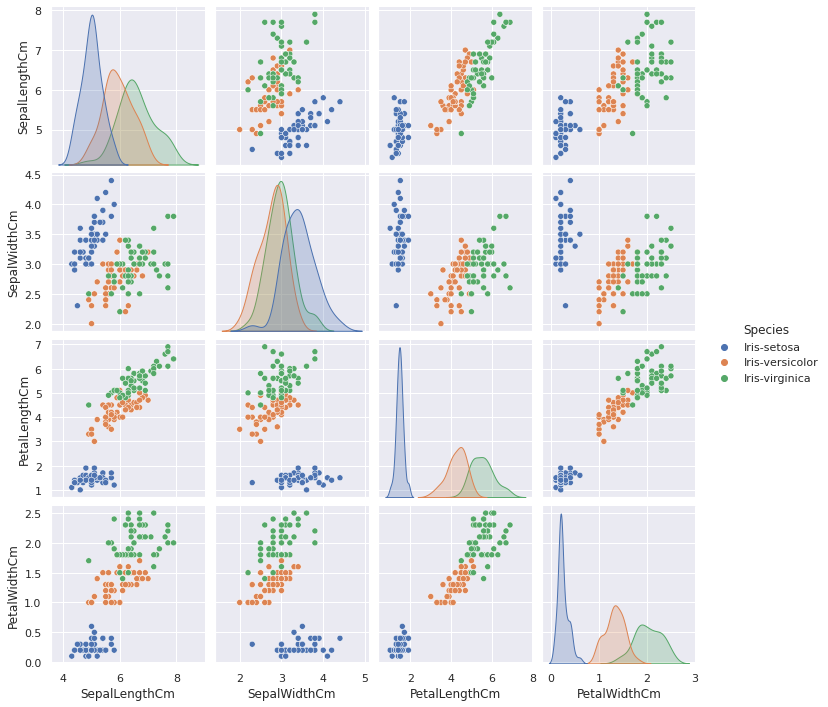

In [40]:
p=sns.pairplot(df, hue = 'Species')  # Pair plot show relationship between each pair of variable

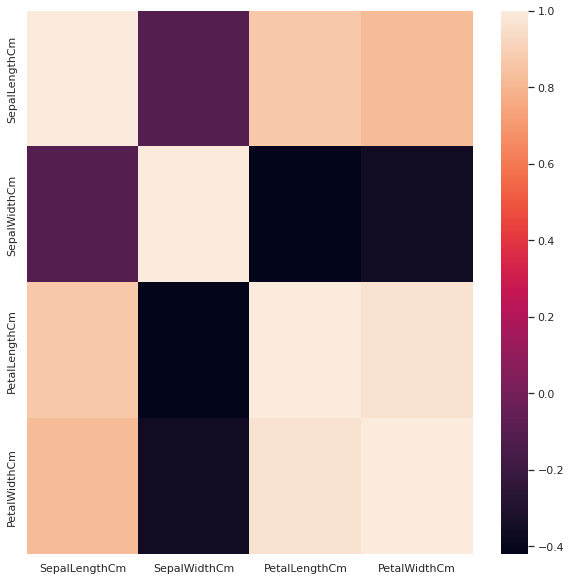

In [41]:
plt.figure(figsize=(10,10))
p=sns.heatmap(df.corr()) 

In [42]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [43]:
# Separate the Target column that is the class column values in y array and rest of the values of the 
# independent features in X array variables as below.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [44]:
X.shape, y.shape   # determine size

((150, 4), (150,))

In [45]:
#Standardizing the data 
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [46]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [47]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


**PCA using SVD**

In [48]:
u,s,v = np.linalg.svd(X_std.T)

print(u)
print('\n')
print(s)
print('\n')
print(v)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


[20.89551896 11.75513248  4.7013819   1.75816839]


[[ 1.08374515e-01  9.98503796e-02  1.13323362e-01 ... -7.27833114e-02
  -6.58701606e-02 -4.59092965e-02]
 [-4.30198387e-02  5.57547718e-02  2.70926177e-02 ... -2.26960075e-02
  -8.64611208e-02  1.89567788e-03]
 [ 2.59377669e-02  4.83370288e-02 -1.09498919e-02 ... -3.81328738e-02
  -1.98113038e-01 -1.12476331e-01]
 ...
 [ 5.42576376e-02  5.32189412e-03  2.76010922e-02 ...  9.89545817e-01
  -1.40226565e-02 -7.86338250e-04]
 [ 1.60581494e-03  8.56651825e-02  1.78415121e-01 ... -1.24233079e-02
   9.52228601e-01 -2.19591161e-02]
 [ 2.27770498e-03  6.44405862e-03  1.49430370e-01 ... -6.58105858e-04
  -2.32385318e-02  9.77215825e-01]]


*SVD to confirm that the result are indeed the same*

In [49]:
# list of (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sorting pairs from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [50]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

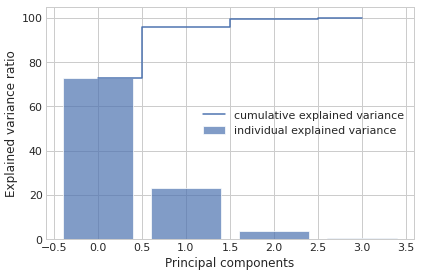

In [51]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.7, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

*Principle component 1 (approx 73%), Principle component 2 (approx 23%) constitute most variance and others are having negligible contribution in total 100%. Hence we can ignore other component*

In [52]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [53]:
Y = X_std.dot(matrix_w)
principalDf = pd.DataFrame(data = Y
          , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


In [54]:
#Compiling into a fresh DataFrame.
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['Species'])], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


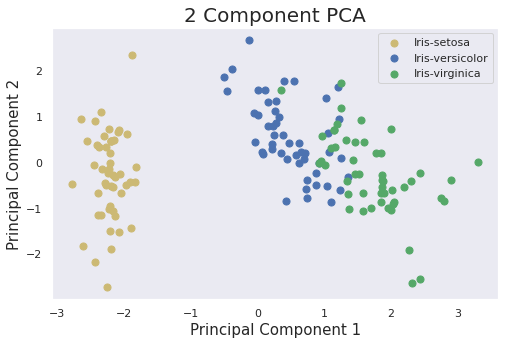

In [55]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['y', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**PCA using Scikit learn**

In [56]:
import numpy as np     # support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on arrays
import matplotlib.pyplot as plt       # support for plotting figure

from sklearn.decomposition import PCA
from sklearn import datasets  # sckit learn contain iris datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [57]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [58]:
pca = PCA(n_components=2)

In [59]:
pca.fit(X)

PCA(n_components=2)

In [60]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [61]:
Z= pca.transform(X)
Z.shape

(150, 2)

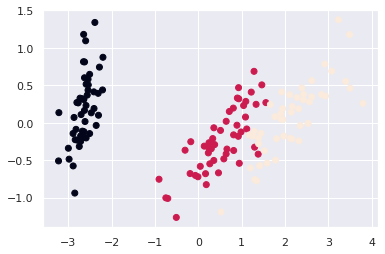

In [62]:
plt.scatter(Z[:,0],Z[:,1],c=y)